# Analyzing Restaurants in Ahmedabad

In [0]:
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import seaborn as sns
sns.set()

In [0]:
CLIENT_ID = '4EDTWLS3HUX5C4BFIANTNTGN1VGNCDJDNPC5HX3KU2MKM3SP' # your Foursquare ID
CLIENT_SECRET = 'CN3MRIKHFLGVLQEJBLYRBEM0JBYQS1PCNEX0K4GAAEFQNZBN' # your Foursquare Secret
VERSION = '20190913' # Foursquare API version
downtor_lat = 23.033863
downtor_long = 72.585022
radius = 20000
category_id = '4d4b7105d754a06374d81259'
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                downtor_lat, 
                downtor_long, 
                radius,
                category_id,
                LIMIT)

results = requests.get(url).json()

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if (len(categories_list) == 0) and (categories_list[0]['id'] != '4d4b7105d754a06374d81259'):
        return None
    else:
        return categories_list[0]['name']

In [32]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Manek Chowk Khau Gali,Snack Place,23.023505,72.588539
1,Manek Chowk,Fast Food Restaurant,23.023626,72.588553
2,TOMATO'S,Mexican Restaurant,23.026693,72.557488
3,Havmor,Indian Restaurant,23.037739,72.565734
4,Swati Snacks,Snack Place,23.024438,72.559087


In [33]:
nearby_venues.shape

(100, 4)

In [0]:
nearby_venues = nearby_venues.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [35]:
nearby_venues

,name,categories,lat,lng
0,manek chowk khau gali,snack place,23.023505,72.588539
1,manek chowk,fast food restaurant,23.023626,72.588553
2,tomato's,mexican restaurant,23.026693,72.557488
3,havmor,indian restaurant,23.037739,72.565734
4,swati snacks,snack place,23.024438,72.559087
5,upper crust,diner,23.041185,72.548784
6,dunkin' donuts,donut shop,23.024411,72.556351
7,upper crust,bakery,23.040622,72.527359
8,mocha,café,23.029512,72.554790
9,zencafe,café,23.036322,72.549455


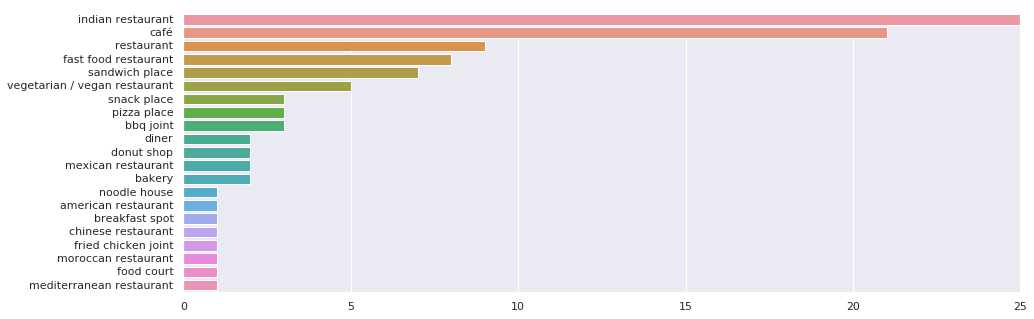

In [95]:
sns.set(rc={'figure.figsize':(15,5)})
venue_plot = sns.barplot(x=nearby_venues.categories.value_counts(), y=nearby_venues.categories.value_counts().index, orient='h')
venue_plot.set(xlabel='', ylabel='')
venue_plot